rmse 405.9853379387751
rscore 0.629739753490305
rmse 393.06552365136827
rscore 0.652930625672898
rmse 401.8867104579166
rscore 0.6371779460460438


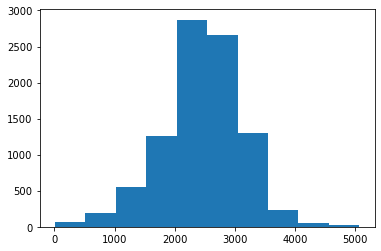

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import csv 

db = [] # retrive data
with open("gainOutCome.csv","r") as f:
    reader = csv.reader(f)
    db = [row for row in reader]

db = np.array(db)
deathday = db[:,0].astype(np.float64)
CT = db[:,1:].astype(np.float64)
deathday = deathday.astype(int)  
plt.hist(deathday)

X_train, X_test, y_train, y_test = train_test_split(CT, deathday, test_size=0.2, random_state=666)
standardScalar = StandardScaler() 
standardScalar.fit(X_train)
X_train_std = standardScalar.transform(X_train)
X_test_std = standardScalar.transform(X_test)

reg = LinearRegression().fit(X_train_std, y_train)
y_predicted = reg.predict(X_test_std)
rms = np.sqrt(mean_squared_error(y_test, y_predicted))
rScore = r2_score(y_test, y_predicted)
print("rmse",rms)
print("rscore",rScore)

regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train_std, y_train)
y_predicted = regr.predict(X_test_std)
rms = np.sqrt(mean_squared_error(y_test, y_predicted))
rScore = r2_score(y_test, y_predicted)
print("rmse",rms)
print("rscore",rScore)


reg =  KNeighborsRegressor(n_neighbors=17)
reg.fit(X_train_std, y_train)
y_predicted = reg.predict(X_test_std)
rms = np.sqrt(mean_squared_error(y_test, y_predicted))
rScore = r2_score(y_test, y_predicted)
print("rmse",rms)
print("rscore",rScore)